In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
import seaborn as sns
from pylab import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We have no NA values which is good

Class as pie chart:


Text(0,0.5,'')

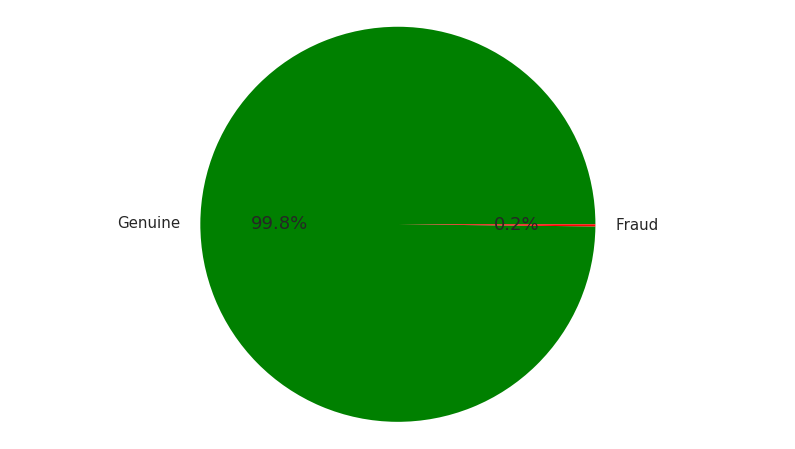

In [4]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','r'])
plt.axis('equal')
plt.ylabel('')

Our dataset is very unbalanced. We have to do something about it

# Undersampling

Our goal here is to delete instances from the over-represented class

In [5]:
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, shuffle=False)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
y_train = df_train['Class']
y_test = df_test['Class']

X_train = df_train.drop(['Class'], axis=1)
X_test = df_test.drop(['Class'], axis=1)

print(len(X_train))

227845


In [7]:
# Number of data points in the minority class
number_records_fraud = len(df_train[df_train.Class == 1])
fraud_indices = np.array(df_train[df_train.Class == 1].index)
# Picking the indices of the normal classes
normal_indices = df_train[df_train.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(max(under_sample_indices))
# Under sample dataset
under_sample_data = df_train.iloc[under_sample_indices,:]

y_undersample = under_sample_data['Class']
X_undersample = under_sample_data.drop(['Class'], axis=1)

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

227389
Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  834


Now we have as much frauds than genuines

In [8]:
# Let's do a train_test_split on these data

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0
)

Now we will try some algorithms with GridSearch

### Logistic Regression

First let's build our model around the undersampled data

In [9]:
lr_param_C = [0.01,0.1,1,10,100]
lr_param_grid = {'C': lr_param_C, 'penalty': ['l1']}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid)
lr_grid_search.fit(X_train_under, y_train_under)

print('Logistic Regression')
print('The best score with GridSearch for Logistic Regression is :', lr_grid_search.best_score_)
print('The best parameters with GridSearch for Logistic Regression are :', lr_grid_search.best_params_)

lr_best_params = lr_grid_search.best_params_

lr = LogisticRegression(C=lr_best_params['C'], penalty='l1')
lr.fit(X_train_under, y_train_under)
lr_train_score = lr.score(X_train_under, y_train_under)
lr_test_score = lr.score(X_test_under, y_test_under)
print  ('Logistic Regression train score =', lr_train_score)
print  ('Logistic Regression test score = ', lr_test_score)

Logistic Regression
The best score with GridSearch for Logistic Regression is : 0.945111492281
The best parameters with GridSearch for Logistic Regression are : {'C': 1, 'penalty': 'l1'}
Logistic Regression train score = 0.955403087479
Logistic Regression test score =  0.9203187251


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.890625


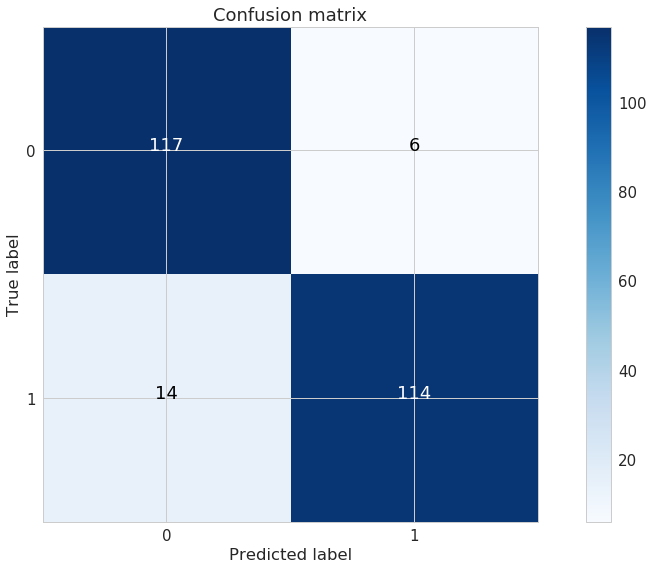

In [11]:
y_pred_undersample_lr = lr.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under,y_pred_undersample_lr)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.906666666667
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     56887
          1       0.03      0.91      0.06        75

avg / total       1.00      0.97      0.98     56962



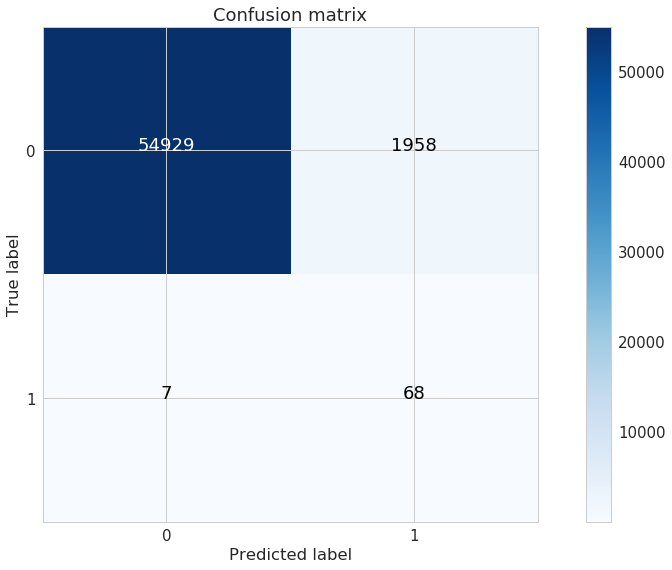

In [12]:
y_pred = lr.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### SVM

SVC :
The best score with GridSearch for SVC is : 0.926243567753
The best parameters with GridSearch for SVC are : {'C': 10}
SVC train score = 0.996569468268
SVC test score =  0.896414342629
Recall metric in the testing dataset:  0.9296875


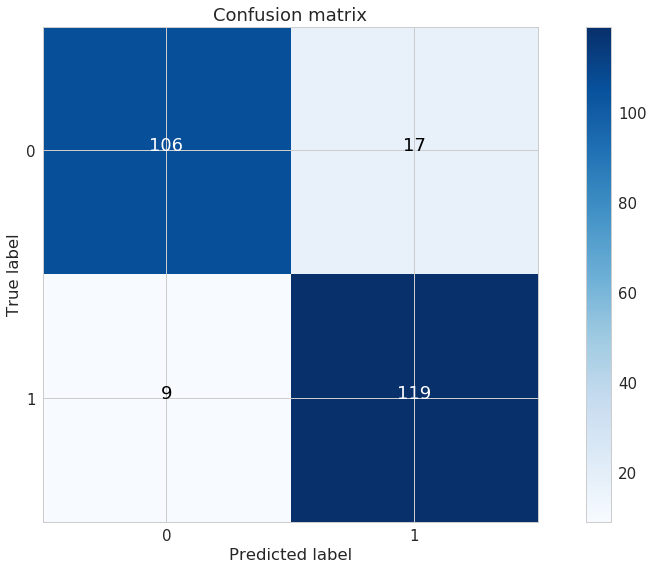

In [13]:
svc_param_C = [0.01,0.1,1,10,100]
svc_param_grid = {'C': svc_param_C}

svc_grid_search = GridSearchCV(SVC(), svc_param_grid)
svc_grid_search.fit(X_train_under, y_train_under)

print('SVC :')
print('The best score with GridSearch for SVC is :', svc_grid_search.best_score_)
print('The best parameters with GridSearch for SVC are :', svc_grid_search.best_params_)

svc_best_params = svc_grid_search.best_params_

svc = SVC(C=svc_best_params['C'])
svc.fit(X_train_under, y_train_under)
svc_train_score = svc.score(X_train_under, y_train_under)
svc_test_score = svc.score(X_test_under, y_test_under)
print  ('SVC train score =', svc_train_score)
print  ('SVC test score = ', svc_test_score)

y_pred_undersample_svc = svc.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_svc)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.96
             precision    recall  f1-score   support

          0       1.00      0.88      0.94     56887
          1       0.01      0.96      0.02        75

avg / total       1.00      0.88      0.94     56962



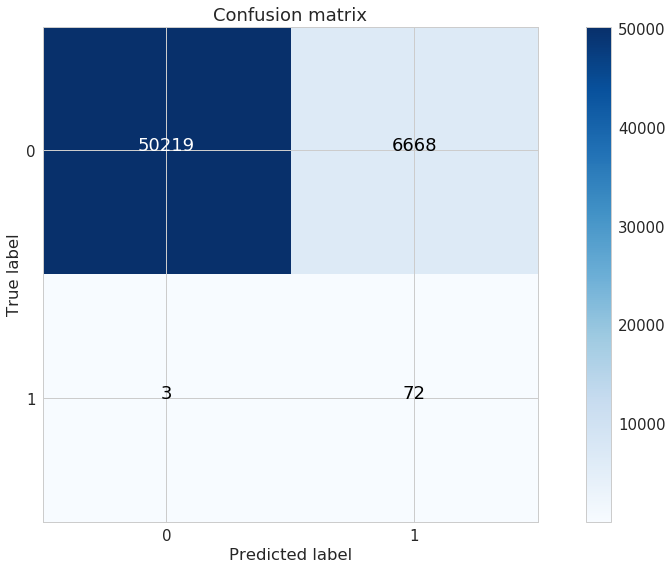

In [14]:
y_pred_svc = svc.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred_svc))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Random Forest

rf :
The best score with GridSearch for rf is : 0.941680960549
The best parameters with GridSearch for rf are : {'n_estimators': 10}
rf train score = 0.994854202401
rf test score =  0.9203187251
Recall metric in the testing dataset:  0.8828125


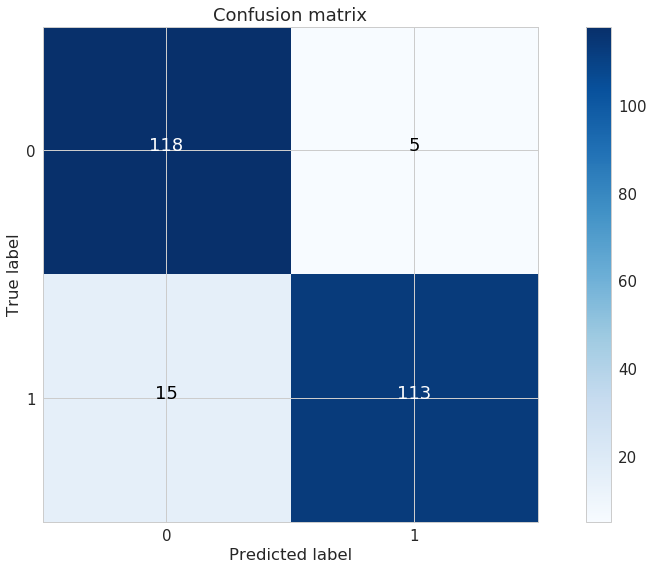

In [15]:
rf_param_n_estimator = [1,10,100]
rf_param_grid = {'n_estimators': rf_param_n_estimator}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid)
rf_grid_search.fit(X_train_under, y_train_under)

print('rf :')
print('The best score with GridSearch for rf is :', rf_grid_search.best_score_)
print('The best parameters with GridSearch for rf are :', rf_grid_search.best_params_)

rf_best_params = rf_grid_search.best_params_

rf = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'])
rf.fit(X_train_under, y_train_under)
rf_train_score = rf.score(X_train_under, y_train_under)
rf_test_score = rf.score(X_test_under, y_test_under)
print  ('rf train score =', rf_train_score)
print  ('rf test score = ', rf_test_score)

y_pred_undersample_rf = rf.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_rf)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.866666666667
             precision    recall  f1-score   support

          0       1.00      0.97      0.98     56887
          1       0.04      0.87      0.07        75

avg / total       1.00      0.97      0.98     56962



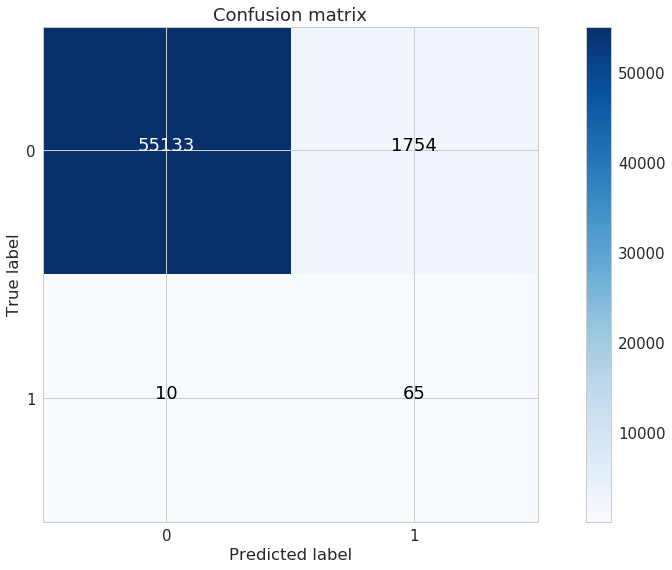

In [16]:
y_pred_rf = rf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_rf)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred_rf))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### XGBoost

xgb train score = 0.939965694683
xgb test score =  0.896414342629
Recall metric in the testing dataset:  0.859375


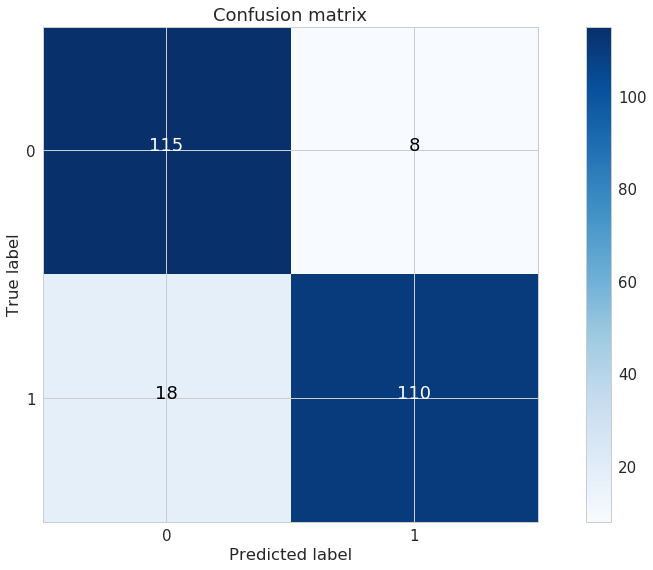

In [18]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

xgb_rs_params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgb_rs = XGBClassifier(nthreads=-1)  
gs = RandomizedSearchCV(xgb_rs, xgb_rs_params, n_jobs=1)  
xgb_best_model = gs.fit(X_train_under, y_train_under)  

xgb_train_score = xgb_best_model.score(X_train_under, y_train_under)
xgb_test_score = xgb_best_model.score(X_test_under, y_test_under)

print  ('xgb train score =', xgb_train_score)
print  ('xgb test score = ', xgb_test_score)

y_pred_undersample_xgb = xgb_best_model.predict(X_test_under)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_under, y_pred_undersample_xgb)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the original  dataset:  0.933333333333
             precision    recall  f1-score   support

          0       1.00      0.92      0.96     56887
          1       0.02      0.93      0.03        75

avg / total       1.00      0.93      0.96     56962



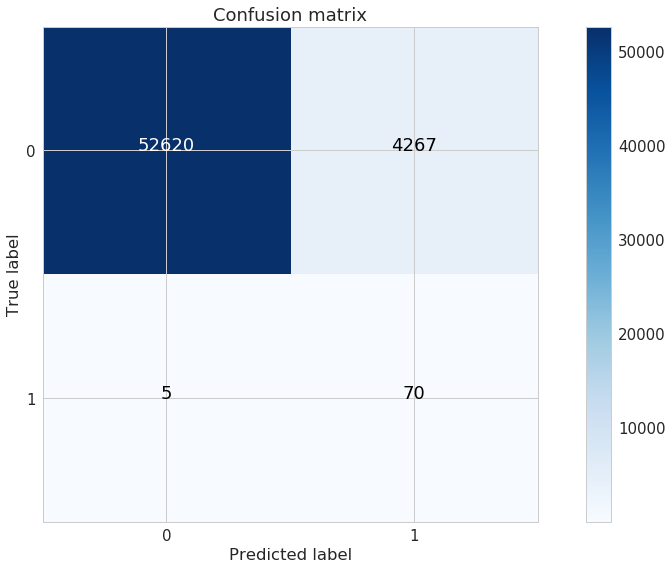

In [19]:
y_pred_xgb = xgb_best_model.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_xgb)
np.set_printoptions(precision=2)

print("Recall metric in the original  dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print(metrics.classification_report(y_test, y_pred_xgb))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

### Neural Networks

In [20]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [21]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    
    return recall

def getModel():
    model = Sequential()
    
    model.add(Dense(16, input_dim=29))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(18))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(20))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(24))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', recall])
    
    
    return model

def get_callbacks(model_filepath, log_dir, patience=10):
    earlystopping = EarlyStopping('val_loss', patience=patience, mode="min")
    checkpointer = ModelCheckpoint(filepath=model_filepath,
                               verbose=0,
                               save_best_only=True)
    tensorboard = TensorBoard(log_dir=log_dir,
                              histogram_freq=0,
                              write_graph=True,
                              write_images=True)
    return [earlystopping, checkpointer, tensorboard]
file_path_feed_forward = ".model_weights_feed_forward.hdf5"
log_dir_feed_forward = './logs/feed_forward'
callbacks_feed_forward = get_callbacks(file_path_feed_forward, log_dir_feed_forward, patience=100)

In [22]:
X_train_under_array = X_train_under.as_matrix()
y_train_under_array = y_train_under.as_matrix()
X_test_under_array = X_test_under.as_matrix()
y_test_under_array = y_test_under.as_matrix()

In [23]:
import os
model=getModel()
model.fit(X_train_under_array, y_train_under_array,
          batch_size=24,
          epochs=1000,
          verbose=1,
          validation_data=(X_test_under_array, y_test_under_array),
          callbacks=callbacks_feed_forward)

Train on 583 samples, validate on 251 samples
Epoch 1/1000
583/583 [==============================] - 0s 753us/step - loss: 0.9756 - acc: 0.5300 - recall: 0.3922 - val_loss: 0.7099 - val_acc: 0.3865 - val_recall: 0.2996
Epoch 2/1000
583/583 [==============================] - 0s 254us/step - loss: 0.7138 - acc: 0.5643 - recall: 0.6824 - val_loss: 0.6413 - val_acc: 0.6614 - val_recall: 0.9444
Epoch 3/1000
583/583 [==============================] - 0s 206us/step - loss: 0.6659 - acc: 0.5918 - recall: 0.7271 - val_loss: 0.5934 - val_acc: 0.7131 - val_recall: 0.8979
Epoch 4/1000
583/583 [==============================] - 0s 251us/step - loss: 0.6536 - acc: 0.6192 - recall: 0.7234 - val_loss: 0.5400 - val_acc: 0.7928 - val_recall: 0.8988
Epoch 5/1000
583/583 [==============================] - 0s 239us/step - loss: 0.6113 - acc: 0.6672 - recall: 0.7443 - val_loss: 0.4839 - val_acc: 0.8685 - val_recall: 0.8812
Epoch 6/1000
583/583 [==============================] - 0s 219us/step - loss: 0.5389

583/583 [==============================] - 0s 182us/step - loss: 0.1497 - acc: 0.9383 - recall: 0.8966 - val_loss: 0.2919 - val_acc: 0.9243 - val_recall: 0.9012
Epoch 48/1000
583/583 [==============================] - 0s 171us/step - loss: 0.1240 - acc: 0.9468 - recall: 0.9210 - val_loss: 0.2960 - val_acc: 0.9243 - val_recall: 0.9012
Epoch 49/1000
583/583 [==============================] - 0s 171us/step - loss: 0.1227 - acc: 0.9554 - recall: 0.9257 - val_loss: 0.3008 - val_acc: 0.9243 - val_recall: 0.9012
Epoch 50/1000
583/583 [==============================] - 0s 187us/step - loss: 0.1204 - acc: 0.9605 - recall: 0.9384 - val_loss: 0.3059 - val_acc: 0.9243 - val_recall: 0.9012
Epoch 51/1000
583/583 [==============================] - 0s 168us/step - loss: 0.1488 - acc: 0.9417 - recall: 0.9078 - val_loss: 0.3076 - val_acc: 0.9243 - val_recall: 0.9012
Epoch 52/1000
583/583 [==============================] - 0s 169us/step - loss: 0.1451 - acc: 0.9348 - recall: 0.8945 - val_loss: 0.3116 - v

Epoch 94/1000
583/583 [==============================] - 0s 176us/step - loss: 0.0906 - acc: 0.9605 - recall: 0.9576 - val_loss: 0.4075 - val_acc: 0.9044 - val_recall: 0.8916
Epoch 95/1000
583/583 [==============================] - 0s 163us/step - loss: 0.0620 - acc: 0.9760 - recall: 0.9698 - val_loss: 0.4120 - val_acc: 0.9044 - val_recall: 0.8916
Epoch 96/1000
583/583 [==============================] - 0s 161us/step - loss: 0.0778 - acc: 0.9691 - recall: 0.9625 - val_loss: 0.4146 - val_acc: 0.9044 - val_recall: 0.8916
Epoch 97/1000
583/583 [==============================] - 0s 166us/step - loss: 0.0714 - acc: 0.9674 - recall: 0.9593 - val_loss: 0.4208 - val_acc: 0.9044 - val_recall: 0.8916
Epoch 98/1000
583/583 [==============================] - 0s 171us/step - loss: 0.0670 - acc: 0.9777 - recall: 0.9813 - val_loss: 0.4355 - val_acc: 0.9044 - val_recall: 0.8916
Epoch 99/1000
583/583 [==============================] - 0s 176us/step - loss: 0.0898 - acc: 0.9623 - recall: 0.9586 - val_lo

In [24]:
score = model.evaluate(X_test.as_matrix(), y_test.as_matrix(), batch_size=24)
print('Original dataset loss:', score[0])
print('Original dataset accuracy:', score[1])

56962/56962 [==============================] - 2s 41us/step
Original dataset loss: 0.131537903673
Original dataset accuracy: 0.948948418406


In [25]:
y_pred_dl = model.predict(X_test.as_matrix(), batch_size=24, verbose=1)

56962/56962 [==============================] - 1s 25us/step


Recall : 0.92
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     56887
          1       0.02      0.92      0.05        75

avg / total       1.00      0.95      0.97     56962



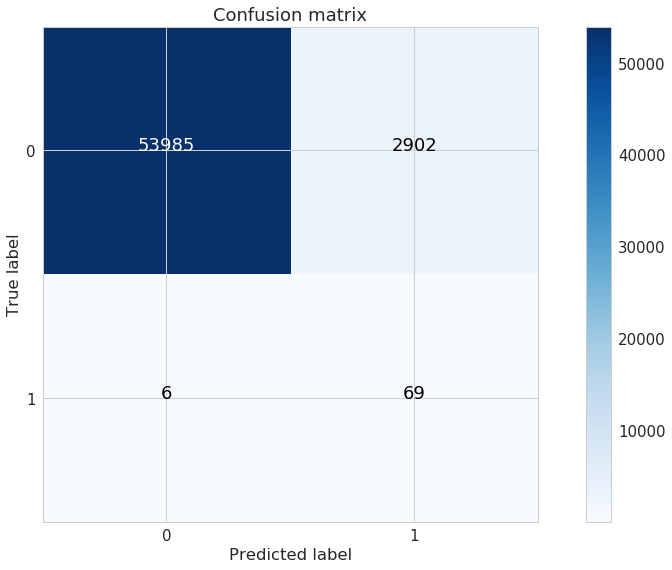

In [26]:
confuction_matrix_dl = confusion_matrix(y_test.as_matrix(), np.round(y_pred_dl))
# print(confuction_matrix_dl)
print('Recall :', confuction_matrix_dl[1,1]/(confuction_matrix_dl[1,0]+confuction_matrix_dl[1,1]))
print(metrics.classification_report(y_test.as_matrix(), np.round(y_pred_dl)))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confuction_matrix_dl
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Unsupervised Learning

#### Preprocessing

In [27]:
X_train_good = X_train[y_train == 0]
X_test_good = X_test[y_test == 0]

### One-Class SVM

In [28]:
# Instantiate normalisation 
# nrm = MinMaxScaler()

In [29]:
# one_svm = OneClassSVM(random_state=2008, nu=0.2) # Nu set by trial and error
# svm_pl = Pipeline([('Normalise', nrm),
#                    ('SVM', one_svm)])
# svm_pl.fit(X_train_good)

In [30]:
# preds = svm_pl.predict(X_test)  
# preds = ((preds * -1) + 1) / 2

# print(metrics.classification_report(y_test, preds))
# confuction_matrix_dl = confusion_matrix(y_test, preds)
# print(confuction_matrix_dl)

### Autoencoder

#### Building the model

In [31]:
input_dim = X_train.shape[1]
encoding_dim = 14
nb_epoch = 200
batch_size = 32

In [32]:
def getAutoEncoderModel(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim, activation="tanh", 
                    activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

    decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
    decoder = Dense(input_dim, activation='relu')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
    
    return autoencoder

In [34]:
file_path_autoencoder = ".model_weights_autoencoder.hdf5"
log_dir_autoencoder = './logs/autoencoder'
callbacks_autoencoder = get_callbacks(file_path_autoencoder, log_dir_autoencoder, patience=10)

autoencoder = getAutoEncoderModel(input_dim, encoding_dim)
history = autoencoder.fit(X_train_good, X_train_good,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=callbacks_autoencoder).history

Train on 227428 samples, validate on 56962 samples
Epoch 1/200
227428/227428 [==============================] - 19s 84us/step - loss: 0.8067 - acc: 0.5740 - val_loss: 0.7875 - val_acc: 0.6941
Epoch 2/200
227428/227428 [==============================] - 19s 83us/step - loss: 0.7457 - acc: 0.6564 - val_loss: 0.7777 - val_acc: 0.6998
Epoch 3/200
227428/227428 [==============================] - 19s 83us/step - loss: 0.7366 - acc: 0.6710 - val_loss: 0.7699 - val_acc: 0.7049
Epoch 4/200
227428/227428 [==============================] - 19s 83us/step - loss: 0.7313 - acc: 0.6783 - val_loss: 0.7687 - val_acc: 0.7020
Epoch 5/200
227428/227428 [==============================] - 19s 83us/step - loss: 0.7285 - acc: 0.6789 - val_loss: 0.7651 - val_acc: 0.7035
Epoch 6/200
227428/227428 [==============================] - 19s 83us/step - loss: 0.7259 - acc: 0.6759 - val_loss: 0.7619 - val_acc: 0.7080
Epoch 7/200
227428/227428 [==============================] - 19s 83us/step - loss: 0.7233 - acc: 0.6731

227428/227428 [==============================] - 24s 106us/step - loss: 0.7033 - acc: 0.6924 - val_loss: 0.7312 - val_acc: 0.7422
Epoch 59/200
227428/227428 [==============================] - 23s 102us/step - loss: 0.7024 - acc: 0.6931 - val_loss: 0.7344 - val_acc: 0.7365
Epoch 60/200
227428/227428 [==============================] - 21s 91us/step - loss: 0.7023 - acc: 0.6930 - val_loss: 0.7336 - val_acc: 0.7380
Epoch 61/200
227428/227428 [==============================] - 19s 85us/step - loss: 0.7019 - acc: 0.6929 - val_loss: 0.7326 - val_acc: 0.7374
Epoch 62/200
227428/227428 [==============================] - 19s 82us/step - loss: 0.7024 - acc: 0.6923 - val_loss: 0.7365 - val_acc: 0.7402
Epoch 63/200
227428/227428 [==============================] - 21s 91us/step - loss: 0.7022 - acc: 0.6937 - val_loss: 0.7342 - val_acc: 0.7428
Epoch 64/200
227428/227428 [==============================] - 20s 86us/step - loss: 0.7025 - acc: 0.6919 - val_loss: 0.7392 - val_acc: 0.7312
Epoch 65/200
2274

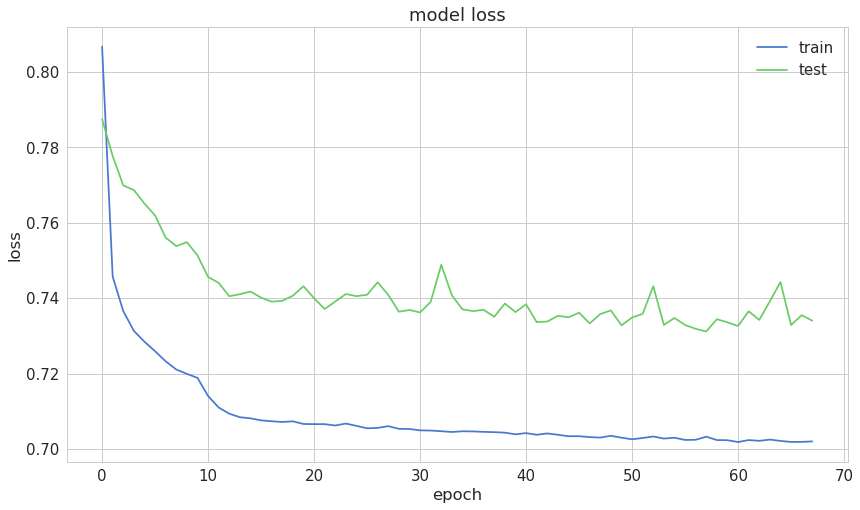

In [35]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [36]:
autoe_preds = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - autoe_preds, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.725021,0.001317
std,7.070140,0.036262
min,0.090291,0.000000
25%,0.275407,0.000000
50%,0.418003,0.000000
75%,0.644526,0.000000
max,1570.647582,1.000000


#### Reconstruction error without fraud

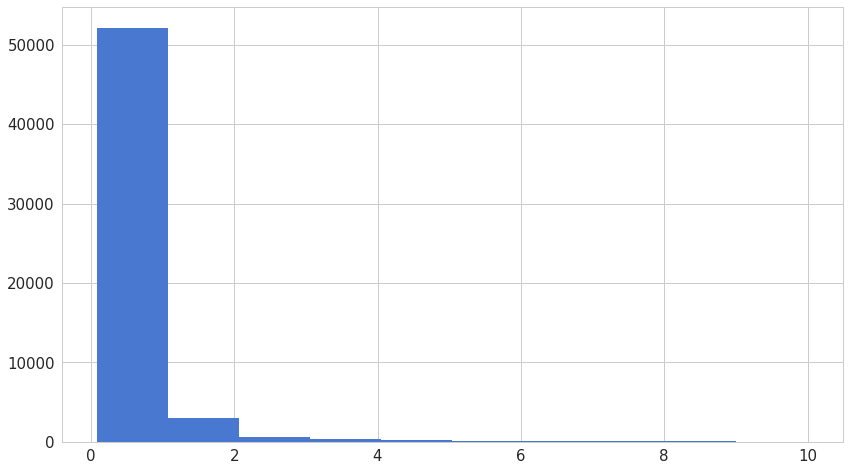

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

#### Reconstruction error with fraud

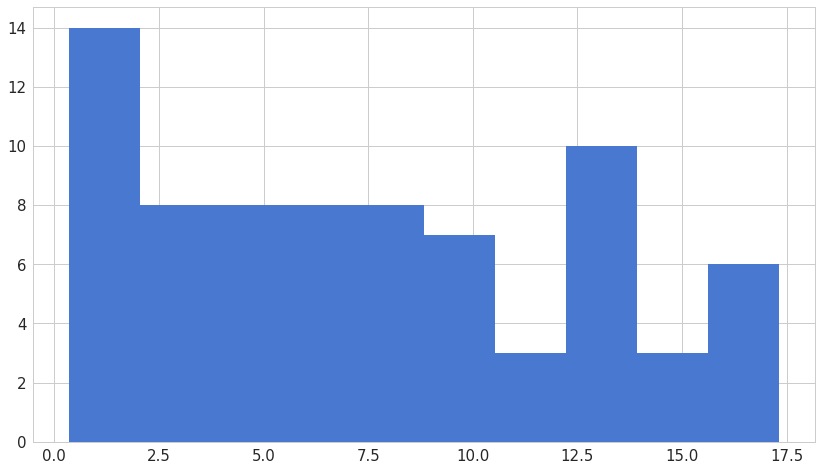

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

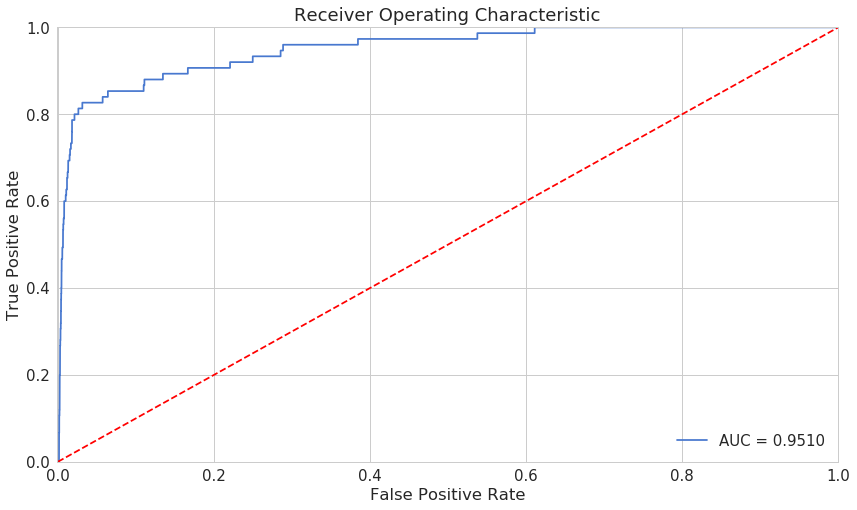

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

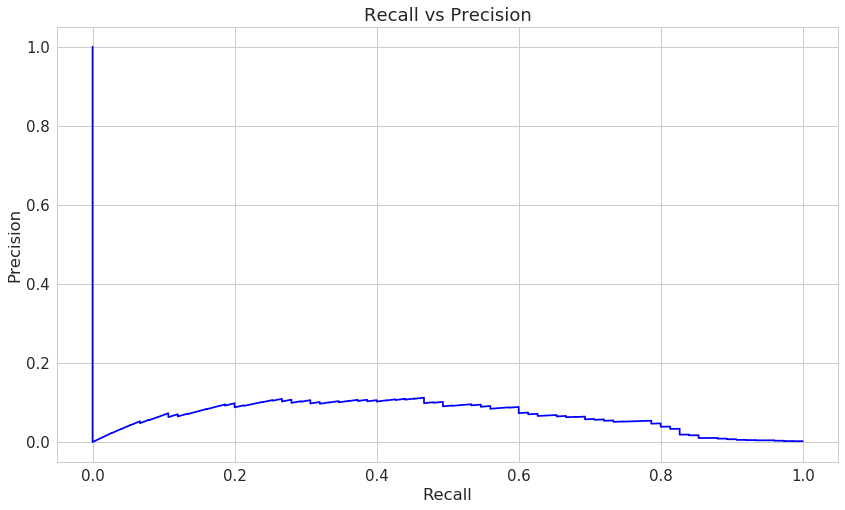

In [40]:
precision, recall, th = metrics.precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

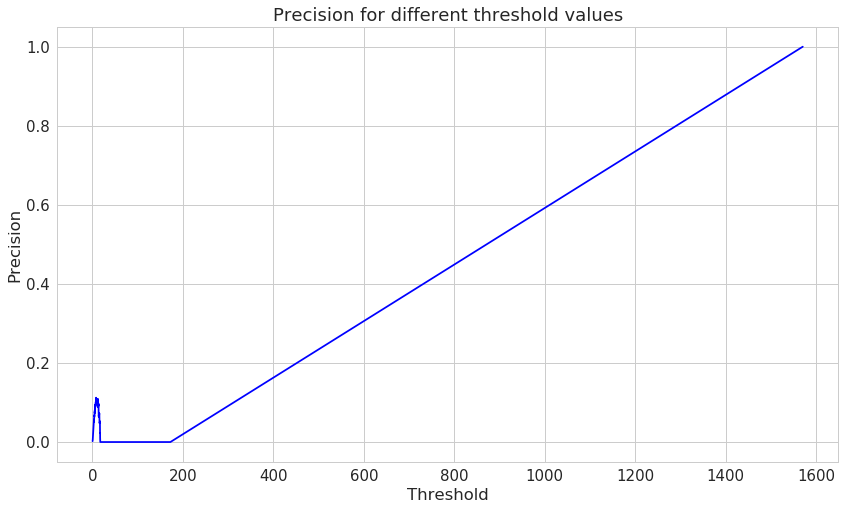

In [41]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

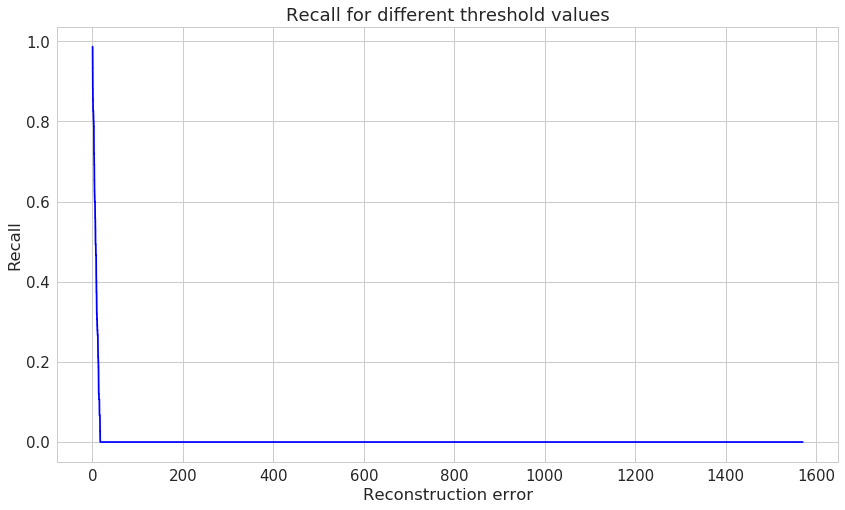

In [42]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

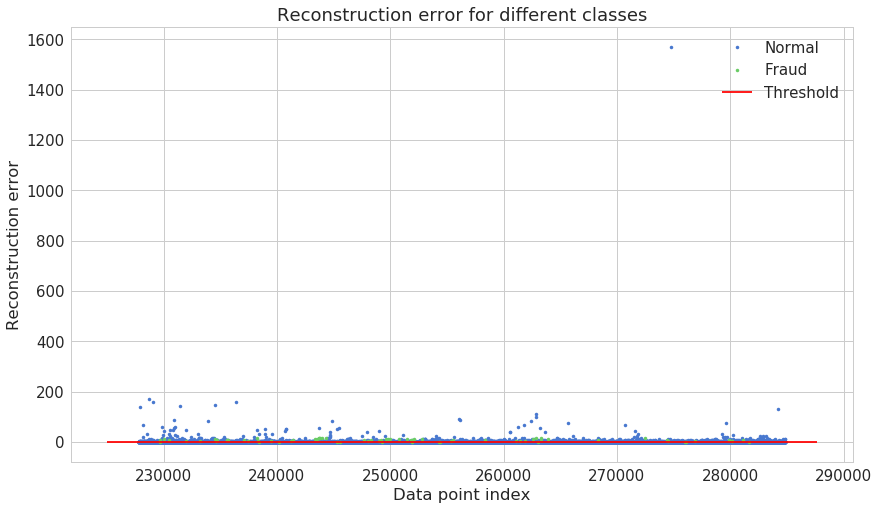

In [53]:
threshold = 0.8

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

             precision    recall  f1-score   support

          0       1.00      0.84      0.91     56887
          1       0.01      0.89      0.01        75

avg / total       1.00      0.84      0.91     56962



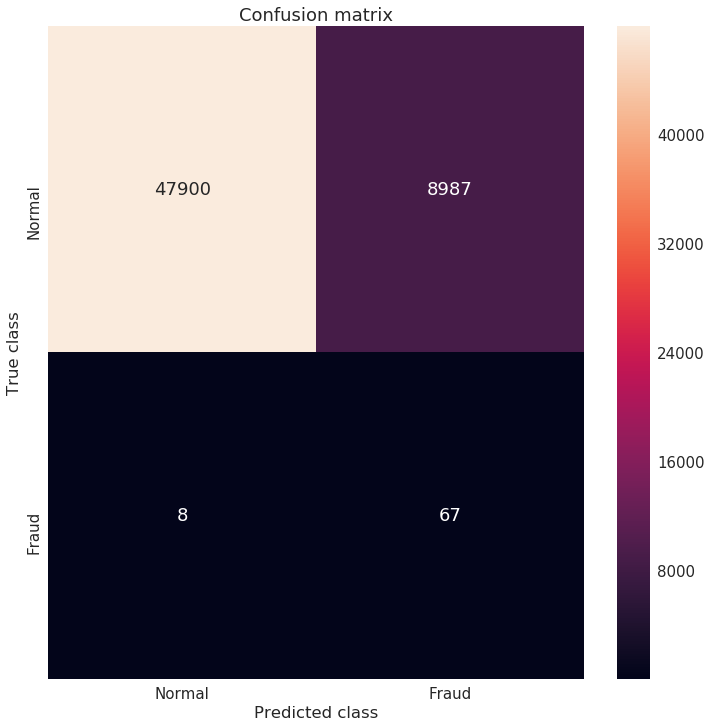

In [54]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
print(metrics.classification_report(error_df.true_class, y_pred))

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()